# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [78]:
# import numpy as np
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# X, y = mnist['data'], mnist['target']

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X= fetch_openml('mnist_784')['data']
y= fetch_openml('mnist_784')['target']

### Now take a look at the shapes of the X and y matricies 

In [86]:


X=pd.DataFrame(X)

y=pd.Series(y)

print(X.shape)
print(y.shape)



(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [88]:
X.loc[36000]



0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Name: 36000, Length: 784, dtype: float64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

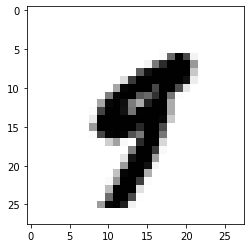

In [90]:
import matplotlib.pyplot as plt
import matplotlib

X=X.to_numpy()


plt.imshow(X[36000].reshape(28,28), cmap=plt.cm.binary, interpolation="nearest")



### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [91]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [22]:

X_train,X_test,y_train,y_test=X[:6000],X[6000:],y[:6000],y[6000:]




### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [37]:
y5=np.where(y=='5',1,0)


y_train_5=y5[:6000]

y_test_5 =y5[6000:]


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [38]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression().fit(X_train,y_train_5) 
y_test_5_pred=model.predict(X_test)  
y_test_5_pred



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 0, 1, 0])

### Does the classifier predict correctly the 36000th digit we picked before?

In [93]:
y_test_5_pred[36000]   

# Yes, predict correctly


0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [40]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [67]:

never_5_clf.fit(X_train,y_train_5)
never5_pred=never_5_clf.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score

C_matrix=confusion_matrix(y_test_5,never5_pred)
C_accuracy=accuracy_score(y_test_5,never5_pred)
C_precision=precision_score(y_test_5,never5_pred)
C_recall=recall_score(y_test_5,never5_pred)
C_f1_scores=f1_score(y_test_5,never5_pred)


# precision=matrix[0][0]/(matrix[0][0] + matrix[0][1])
# recall=matrix[0][0]/(matrix[0][0] + matrix[1][0])
# f1_scores=2*(precision*recall)/(precision+recall)

print(C_matrix)
print('precision:',C_precision)
print('recall:',C_recall)
print('f1_scores:',C_f1_scores)


[[58201     0]
 [ 5799     0]]
precision: 0.0
recall: 0.0
f1_scores: 0.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [66]:
## From Logistic Regression Model


from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score

matrix=confusion_matrix(y_test_5,y_test_5_pred)
accuracy=model.score(X_test,y_test_5)
precision=precision_score(y_test_5,y_test_5_pred)
recall=recall_score(y_test_5,y_test_5_pred)
f1_scores=f1_score(y_test_5,y_test_5_pred)


# precision=matrix[0][0]/(matrix[0][0] + matrix[0][1])
# recall=matrix[0][0]/(matrix[0][0] + matrix[1][0])
# f1_scores=2*(precision*recall)/(precision+recall)

print(matrix)
print('precision:',precision)
print('recall:',recall)
print('f1_scores:',f1_scores)

[[56531  1670]
 [ 1480  4319]]
precision: 0.7211554516613792
recall: 0.7447835833764442
f1_scores: 0.7327790973871734


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

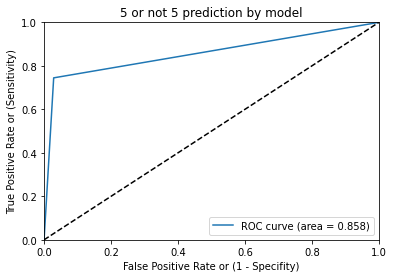

In [94]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



fpr, tpr, thresholds = roc_curve(y_test_5, y_test_5_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('5 or not 5 prediction by model')
plt.legend(loc="lower right")



### Now find the roc_auc_score for each. 

In [74]:

from sklearn.metrics import roc_auc_score



roc_auc_score(y_test_5, y_test_5_pred)


roc_auc_score(y_test_5, never5_pred)


 

0.5

### What does this metric tell you? Which classifier works better with this metric in mind?

In [97]:
print('go with the model, the second one is only guessing')

go with the model, the second one is only guessing
